In [1]:
from superfv import AdvectionSolver, initial_conditions
from functools import partial
import numpy as np
import matplotlib.pyplot as plt

In [2]:
N = 64
T = 1.0

solver0 = AdvectionSolver(
    ic=partial(initial_conditions.square, vx=1),
    nx=N,
    p=0,
)
solver0.run(T)

solver3_a_priori = AdvectionSolver(
    ic=partial(initial_conditions.square, vx=1),
    nx=N,
    p=3,
    ZS=True,
    PAD={"rho": (0, 1)},
)
solver3_a_priori.run(T)

solver3_a_posteriori = AdvectionSolver(
    ic=partial(initial_conditions.square, vx=1),
    nx=N,
    p=3,
    MOOD=True,
    NAD=1e-2,
    PAD={"rho": (0, 1)},
)
solver3_a_posteriori.run(T)

100%|██████████| 1.0/1.0 [00:00]                 
100%|██████████| 1.0/1.0 [00:01]                 
100%|██████████| 1.0/1.0 [00:00]                 


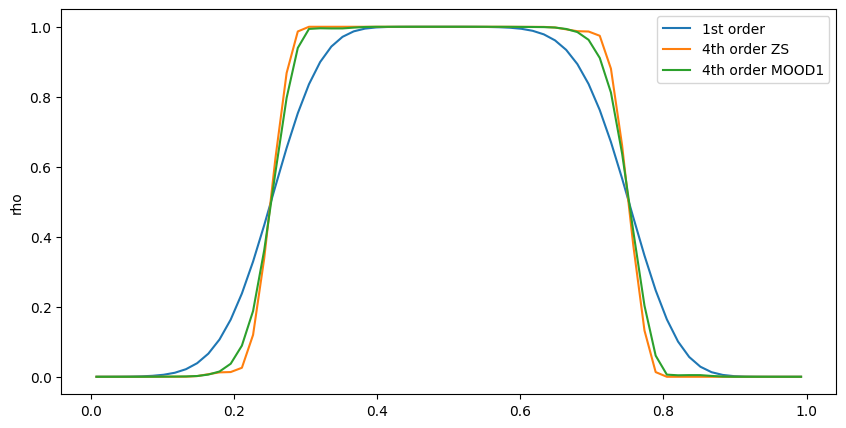

In [3]:
fig, ax = plt.subplots(1, 1, figsize=(10, 5))
ax.set_ylabel("rho")
solver0.plot_1d_slice(ax, "rho", x=None, label="1st order", xlabel=False)
solver3_a_priori.plot_1d_slice(ax, "rho", x=None, label="4th order ZS", xlabel=False)
solver3_a_posteriori.plot_1d_slice(
    ax, "rho", x=None, label="4th order MOOD1", xlabel=False
)
ax.legend()

Text(0.5, 0, 't')

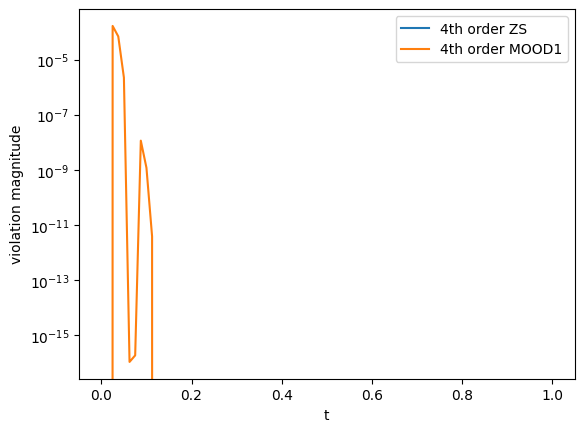

In [4]:
t1 = solver3_a_priori.minisnapshots["t"]
t2 = solver3_a_posteriori.minisnapshots["t"]

plt.plot(
    t1,
    np.minimum(
        -(np.array(solver3_a_priori.minisnapshots["min_rho"]) - 0),
        -(1 - np.array(solver3_a_priori.minisnapshots["max_rho"])),
    ),
    label="4th order ZS",
)
plt.plot(
    t2,
    np.minimum(
        -(np.array(solver3_a_posteriori.minisnapshots["min_rho"]) - 0),
        -(1 - np.array(solver3_a_posteriori.minisnapshots["max_rho"])),
    ),
    label="4th order MOOD1",
)

plt.legend()
plt.yscale("log")
plt.ylabel("violation magnitude")
plt.xlabel("t")

Text(0, 0.5, 'substeps')

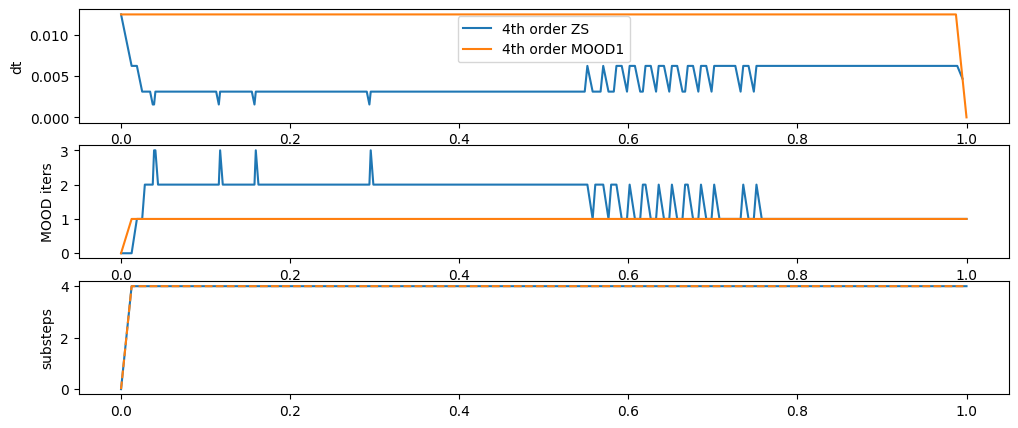

In [5]:
fig, axs = plt.subplots(3, 1, figsize=(12, 5))

axs[0].plot(t1[:-1], np.diff(t1), label="4th order ZS")
axs[0].plot(t2[:-1], np.diff(t2), label="4th order MOOD1")
axs[0].set_ylabel("dt")
axs[0].legend()
axs[1].plot(t1, solver3_a_priori.minisnapshots["MOOD_iters"])
axs[1].plot(t2, solver3_a_posteriori.minisnapshots["MOOD_iters"])
axs[1].set_ylabel("MOOD iters")
axs[2].plot(t1, solver3_a_priori.minisnapshots["n_substeps"])
axs[2].plot(t2, solver3_a_posteriori.minisnapshots["n_substeps"], "--")
axs[2].set_ylabel("substeps")